# Simulated Linear Regression

**Last Edited**: 2017-10-02 17:11:03 

## Executive Summary

In this notebook, I showcase how to do simple linear regression on a simulated data set. The essential idea is there exists some linear function, here $f(x) = 2 + 3x$, that describes some real world process. However in actual collected data in the real world, there will always be some irreducible random errors in our dataset. Therefore actual data will manifest with some random noise $\epsilon$ such that $f(x)_{\text{real}} = f(x) + \epsilon$. We simulate this data by creating an array of inputs $x$ from a uniform distribution on the interval $x \in [-2,2)$ and add noise $\epsilon$ from a normal distribution. We then perform linear regression on this simulated data by assuming a functional form, $y(x) = b_0 + b_1 x$, and extract the parameters $b_0$, $b_1$. The underlying function, an example simulated dataset, and the resulting linear fit are plotted below.

![title](images/example_linear_fit.png)

## Constructing Simulated Data

For this demonstration, we choose the linear function, 

$$\begin{equation}f(x) = 2 + 3x \end{equation} \ ,$$ 

which will be used to create some simulated data. To create the data set we import numpy and pandas, generate 100 random input points from a uniform distribution on an interval $x \in [-2,2)$, find the function's value for each point, and put this information in a pandas dataframe:

In [1]:
# import various libraries
import numpy as np
import pandas as pd

# define our function
def f(x):
    y = 2 + 3 * x
    return y

x_values = np.random.uniform (low=-2, high=2, size=100)

# create simulated data i.e., get f(x) values for our random points
output_values = f(x_values)

test_data_naive = pd.DataFrame({'input':x_values, 'output':output_values})

# display first five rows (entries) from the data set
test_data_naive [:5]

,input,output
0,-1.261690,-1.785069
1,0.711465,4.134395
2,-1.405469,-2.216407
3,0.835321,4.505964
4,0.390887,3.172662


However just using these output values as our simulated data won't generate something instructive. Plotting the 100 values in a scatter and our underlying function as a red line, 

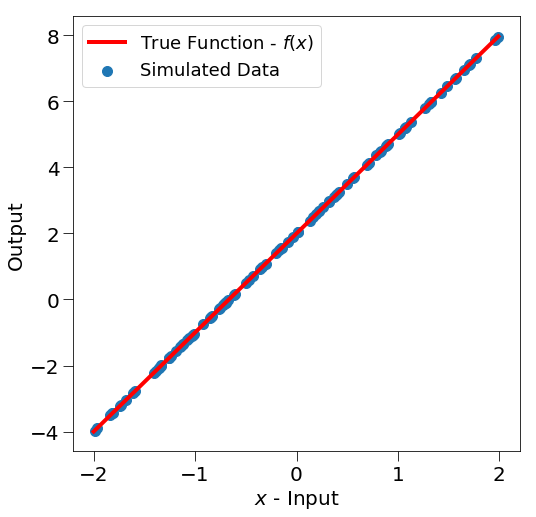

In [2]:
# import plotting/visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

# set custom plotting values
mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20 
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['lines.markersize'] = 1000
mpl.rcParams['legend.fontsize'] = 18


# plot the function and data
x_plot = np.arange(-2., 2, 0.01)
test_data_naive.plot(x='input', y='output', kind='scatter', s =100, label="Simulated Data")
plt.plot(x_plot, f(x_plot), 'r', label="True Function - $f(x)$")
plt.xlabel ("$x$ - Input")
plt.ylabel ("Output")
plt.legend()
plt.show()

we see that we haven't masked that these values come from a linear function. To make something more realistic that one might actually encounter in everyday life, we need to add some random noise $\epsilon$, 

$$\begin{equation} f(x)_{\text{ real}} = f(x) + \epsilon \end{equation} \ .$$

To do this let's generate 100 random values from a normal (Gaussian) distribution to get $\epsilon$, add it to our function, and plot the result:

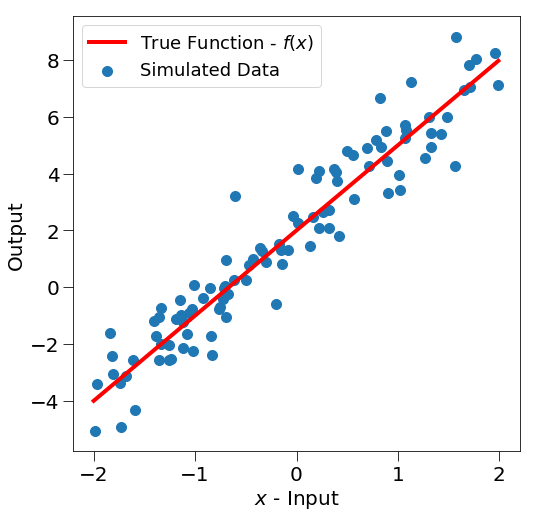

In [3]:
errors = np.random.normal (loc=0.0, scale=1.0, size=100)

# add random noise to function
simul_output = f(x_values) + errors

test_data_real = pd.DataFrame({"input":x_values, "output":simul_output})

# plot function and data with noise
test_data_real.plot(x='input', y='output', kind='scatter', s=100, label="Simulated Data")
plt.xlabel ("$x$ - Input")
plt.ylabel ("Output")
plt.plot(x_plot, f(x_plot), 'r', label="True Function - $f(x)$")
plt.legend()
plt.show()

Much better! 

## Performing Linear Regression

Suppose we are now given this dataset of blue points (meaning a dataframe holding `x_values` and `simul_output`) and want to model it. Looking at it in a plot like above (and pretending we don't see the red line), we think that it could be well modelled by linear regression, that is,

$$\begin{equation} y(x) = b_0 + b_1 x \end{equation} \ ,$$

where $y(x)$ is our prediction for a given input $x$ with $b_0$ and $b_1$ being our two parametric variables (y-intercept and slope respectively). The formulas for these two quantities are given by,

$$\begin{equation} b_0 = \bar{y} - b_1 \bar{x} \end{equation} \ ,$$

$$\begin{equation} b_1 = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{j=1}^n (x_j - \bar{x})^2} \end{equation} \ , $$

where $n$ is our total number of points (here 100) and $\bar{y}$ and $\bar{x}$ are our mean values for `simul_output` and `x_values` respectively,

$$\begin{equation} \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \end{equation} \ ,$$

$$\begin{equation} \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i \end{equation} \ ,$$

In [4]:
xmean = sum(x_values) / x_values.size
ymean = sum(simul_output) / simul_output.size

print ('x mean is %f' % xmean)
print ('y mean is %f' % ymean)

x mean is -0.142102
y mean is 1.624588



Our $\bar{x}$ is close to zero as it should be expected given that we are drawing from a uniform distribution on the range $[-2,2)$. Consequently our $\bar{y}$ should then be in the vicinity of 2 which it is. Now we can go ahead and construct the two parameters in our fit:

In [5]:
b1_num = sum ((x_values - xmean) * (simul_output - ymean)) 
b1_den = sum ((x_values - xmean)**2)

b1 = b1_num / b1_den
b0 = ymean - b1 * xmean

print ('predicted b0 is %f' % b0)
print ('predicted b1 is %f' % b1)

predicted b0 is 2.048587
predicted b1 is 2.983762


The predicted values of $b_0$ and $b_1$ then define our linear fit. As can be seen, they are pretty close to the true values (2 and 3 respectively). Plotting our prediction as a green line, we see that it does a very good job of matching the underlying linear function.

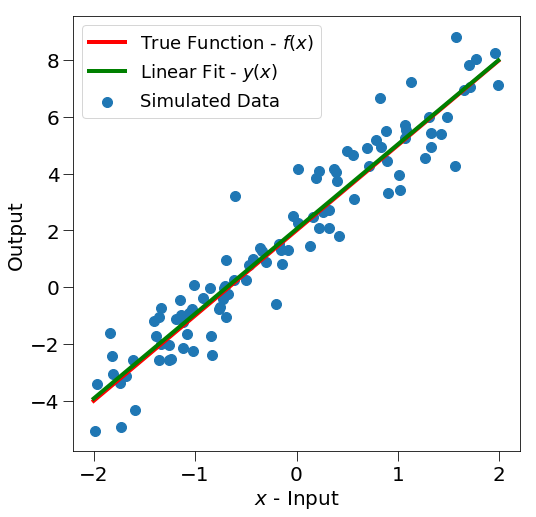

In [6]:
# define our prediction function
def prediction (x):
    y = b0 + b1 * x
    return y

# plot everything
test_data_real.plot(x='input', y='output', kind='scatter', s=100, label="Simulated Data")
plt.plot(x_plot, f(x_plot), 'r', label='True Function - $f(x)$')
plt.plot(x_plot, prediction(x_plot), 'g', label='Linear Fit - $y(x)$')
plt.xlabel ("$x$ - Input")
plt.ylabel ("Output")
plt.legend()
#plt.savefig("example_linear_fit.png")
plt.show()

# Appendix

## Parameter derivation

In this section, we will demonstrate how to arrive at the values for $b_0$ and $b_1$. These are found by minimizing $S$, which is the sum of the square of the errors $e_i$, with respect to each parameter. The formula for $S$ is given by,

$$S = \sum_{i} \left( e_i \right)^2 = \sum_{i} \left[f(x_i) -  y(x_i) \right]^2 \ , \qquad \sum_i \equiv \sum_{i=1}^n \ ,$$

where $f(x_i)$ is the exact output for input $x_i$ while $y(x_i)$ is the output for our parametric choice. For the linear assumption above,

$$S = \sum_{i} \left[ f(x_i) - b_0 - b_1 x_i \right]^2 \ . $$

We now minimize this with respect to $b_0$ by partially differentiating and setting the results to zero:

$$ \frac{\partial S}{\partial b_0} = \sum_{i} 2 \left[f(x_i) - b_0 - b_1 x_i \right] (-1) = 0 \ ,  $$

such that,

$$ 
\begin{align}
\sum_{i} b_0 &= \sum_{i} \left[ f(x_i) - b_1 x_i \right] \\
n b_0 &= \sum_{i} \left[ f(x_i) - b_1 x_i \right] \\
b_0 &= \frac{1}{n} \sum_{i} \left[ f(x_i) - b_1 x_i \right] \\
b_0 &= \bar{y} - b_1 \bar{x} \ .
\end{align}
$$

The coefficient $b_1$ is found in an identical way,

$$ 
\begin{align}
\frac{\partial S}{\partial b_1} &= \sum_{i} (-2 x_i) \left[f(x_i) - b_0 - b_1 x_i \right] = 0 \\
&= \sum_{i} x_i \left[f(x_i) - \bar{y} + b_1 \bar{x} - b_1 x_i \right]
\end{align}
$$

such that,

$$ 
\begin{align}
b_1 \sum_{i} \left[x_i^2 - x_i \bar{x} \right] &= \sum_{i} \left[x_i \ f(x_i) - x_i \bar{y} \right] \\
b_1 \sum_{i} \left[x_i^2 - \frac{x_i}{n} \sum_j x_j \right] &= \sum_{i} \left[x_i \ f(x_i) - \frac{x_i}{n} \sum_j f(x_j) \right] \\
b_1 \left( \sum_{i} x_i^2 - \frac{1}{n} \left[ \sum_i x_i \right]^2 \right) &= \sum_{i} x_i \ f(x_i) - \frac{1}{n} \sum_i x_i \sum_j f(x_j) \\
b_1 &= \frac{cov(x,f(x))}{var(x)}
\end{align}
$$

where we have used the fact that the variance and covariance are defined as,

$$var(x) \equiv \sum_{i} x_i^2 - \frac{1}{n} \left( \sum_i x_i \right)^2$$

$$cov(x,y) \equiv \sum_i x_i y_i - \frac{1}{n} \sum_i x_i \sum_j y_j$$